#                       Credit Card Fraud Detection Capstone Project

###### Name: Sagarika Shukla

## Introduction:

##### - The Credit Card Fraud Detection project focuses on enhancing financial security through advanced machine learning and data analysis techniques.

##### - Its primary goal is to develop a predictive model that can proactively distinguish between legitimate and fraudulent credit card transactions.

##### - Leveraging machine learning, specifically supervised learning and anomaly detection, this project addresses the dynamic nature of fraud patterns, surpassing the limitations of traditional rule-based systems.

##### - Key components involve data preprocessing, feature engineering, model selection, and evaluation metrics.

##### - The exploration of machine learning algorithms, including logistic regression, decision trees, random forests, and support vector machines, aims to identify the most effective approach for fraud detection.

##### - Ultimately, the project aims to provide a robust, efficient, and adaptive solution to safeguard financial transactions from the evolving landscape of fraudulent activities.

### Project Objectives

##### - In this project, the goal is to leverage machine learning models to predict fraudulent credit card transactions. The process typically involves preprocessing and exploring the dataset, which may include features such as transaction amount, location, time, and previous transaction history.

##### - After splitting the dataset into training and testing sets, various machine learning algorithms such as logistic regression, decision trees, random forests, or support vector machines can be employed to build predictive models.

##### - The models are trained on a labeled dataset where instances of fraudulent and non-fraudulent transactions are identified. Evaluation metrics like precision, recall, and the F1 score are commonly used to assess the model's performance. Continuous improvement may involve tuning hyperparameters, employing ensemble methods, or exploring more advanced techniques like anomaly detection.

##### - The final model aims to accurately identify and prevent fraudulent credit card transactions by learning patterns from historical data.

### Project Understanding

##### - Suppose you get a call from your bank, and the customer care executive informs you that your card is about to expire in a week. Immediately, you check your card details and realise that it will expire in the next eight days. Now, to renew your membership, the executive asks you to verify a few details such as your credit card number, the expiry date and the CVV number. Will you share these details with the executive?

##### - In such situations, you need to be careful because the details that you might share with them could grant them unhindered access to your credit card account.

##### - Although digital transactions in India registered a 51% growth in 2018–2019, their safety remains a concern. Fraudulent activities have increased severalfold, with approximately 52,304 cases of credit/debit card fraud reported in FY 2019 alone. Owing to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time to help consumers and banks that are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions.

### Problem Statement

##### The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.



In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [7]:
df = pd.read_csv("creditcard.csv")

Details of the Columns:


Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount: Transaction amount

Class: 1 for fraudulent transactions, 0 otherwise (dependent variable)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Handling Missing Values

In [8]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outliers treatment
##### As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

In [9]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

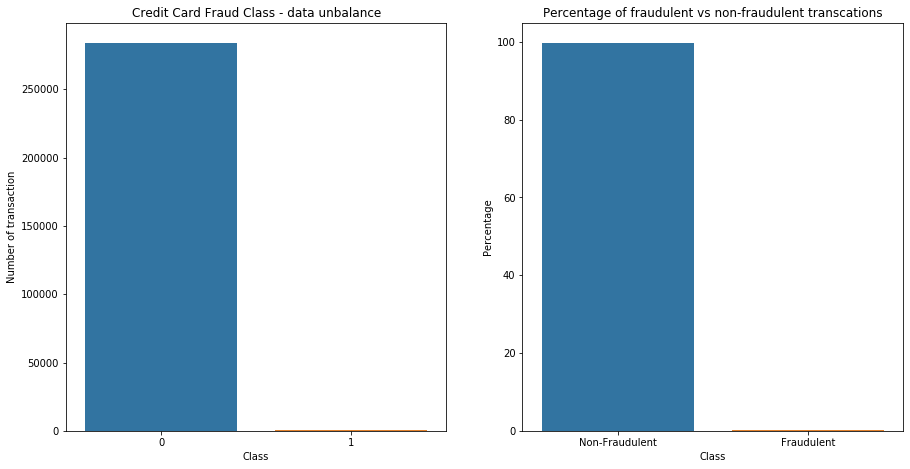

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

### Observation

#### The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

In [5]:
df['Amount'].describe() 

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Check if the data is balanced or imbalanced. the percentage of fraud.

In [12]:
fraud = (df['Class'].values ==1).sum() 
fraud

492

In [13]:
non_fraud = (df['Class'].values ==0).sum() 
non_fraud

284315

In [14]:
classes=df['Class'].value_counts()
genuine_percent=classes[0]/df['Class'].count()*100
fraud_percent=classes[1]/df['Class'].count()*100
print(genuine_percent)
print(fraud_percent)

99.82725143693798
0.1727485630620034


In [15]:
labels = ['Genuine','Fraud']
count = df.Class.value_counts()

As we can see the number of fraudalent transactions are way too less that genuiene transactions. so we can say that it is an imbalanced dataset.

Let’s apply scaling techniques on the “Amount” feature to transform the range of values. We drop the original “Amount” column and add a new column with the scaled values. We also drop the “Time” column as it is irrelevant.

In [16]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [18]:
df.drop(['Amount','Time'], inplace =True, axis=1)

In [19]:
y = df.Class
x = df.drop(['Class'],axis=1)

Splitting the data into training and test set. 80% training. 20% test set

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print("The shape of x_train: ", x_train.shape)
print("The shape of x_test: ",x_test.shape)

The shape of x_train:  (227845, 29)
The shape of x_test:  (56962, 29)


Train and Evaluate our Models on the Dataset Now, Let’s train and evaluate the newly created models on the dataset and pick the best one.

Train the decision tree and random forest models on the dataset using the fit() function. Record the predictions made by the models using the predict() function and evaluate.

Let’s visualize the scores of each of our credit card fraud classifiers.

In [19]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred1 = model_dt.predict(x_test)
model_dt_score = model_dt.score(x_test, y_test)*100

Confusion matrix - Decision Tree

In [20]:
confusion_matrix_dt = confusion_matrix(y_test,y_pred1.round())
print("Confusion Matrix - Decision Tree: ")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree: 
[[56842    22]
 [   23    75]]


In [21]:
import sklearn

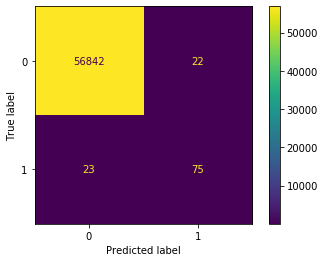

In [22]:
cm_dt = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=[0,1])
cm_dt.plot()
plt.show()

In [23]:
print("Decision Tree score: ", model_dt_score)

Decision Tree score:  99.92099996488886


In [24]:
print("Evaluation of Decision Tree model: ")
print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print("f1 score: ",f1_score(y_test, y_pred1))
print("Recall: ", recall_score(y_test, y_pred1))
print("Precision score", precision_score(y_test, y_pred1))

Evaluation of Decision Tree model: 
Accuracy score:  0.9992099996488887
f1 score:  0.7692307692307693
Recall:  0.7653061224489796
Precision score 0.7731958762886598


In [25]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred2 = model_rf.predict(x_test)
model_rf_score = model_rf.score(x_test, y_test)*100
print("Random Forest score is: ", model_rf_score)

Random Forest score is:  99.96313331694815


In [26]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred2.round())
print("Confusion Matrix - Random Forest: ")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest: 
[[56863     1]
 [   20    78]]


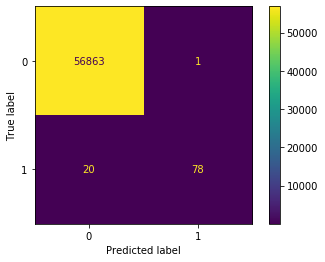

In [27]:
cm_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels=[0,1])
cm_rf.plot()
plt.show()

In [28]:
print("Evaluation of Random Forest model: ")
print("Accuracy score: ",accuracy_score(y_test,y_pred2))
print("F1 score: ", f1_score(y_test, y_pred2))
print("Recall score: ", recall_score(y_test,y_pred2))
print("Precision score: ", precision_score(y_test,y_pred2))

Evaluation of Random Forest model: 
Accuracy score:  0.9996313331694814
F1 score:  0.8813559322033897
Recall score:  0.7959183673469388
Precision score:  0.9873417721518988


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
y_pred3 = model_lg.predict(x_test)
model_lg_score = model_lg.score(x_test, y_test)*100
print("The Logistic Regression model score is: ", model_lg_score)

The Logistic Regression model score is:  99.91222218320986


Random Forest performs better among the three

Address the Class-Imbalance issue

The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The legitimate transactions are more than 99% with the credit card fraud transactions constituting 0.17%.

With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.

The class imbalance problem can be solved by various techniques, such as Undersampling and Oversampling.

Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE, is a method of data augmentation for the minority class.

The above SMOTE is present in the imblearn package. Let’s import that and resample our data.

In the following code below, we resampled our data and we split it using train_test_split() with a split of 80-20.

In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
x_resampled,y_resampled = SMOTE().fit_resample(x,y)
print("shape of resampled x: ", x_resampled.shape)
print("shape of resampled y: ", y_resampled.shape)

value_counts = Counter(y_resampled)
print(value_counts)

shape of resampled x:  (568630, 29)
shape of resampled y:  (568630,)
Counter({0: 284315, 1: 284315})


In [40]:
x_re_train, x_re_test, y_re_train, y_re_test = train_test_split(x_resampled,y_resampled,random_state=42)

Random Forest performed the best so we will apply random forest to our resampled data

In [41]:
resampled_rf = RandomForestClassifier(n_estimators=100)
resampled_rf.fit(x_re_train, y_re_train)
y_re_pred = resampled_rf.predict(x_re_test)
prediction_resampled_score = resampled_rf.score(x_re_test,y_re_test)*100
print("Prediction score for resampled: ", prediction_resampled_score)

Prediction score for resampled:  99.9901518029235


In [42]:
confusion_matrix_rf_resampled = confusion_matrix(y_re_test,y_re_pred.round())
print("Confusion matrix of resampled data - random forest")
print(confusion_matrix_rf_resampled)

Confusion matrix of resampled data - random forest
[[71009    14]
 [    0 71135]]


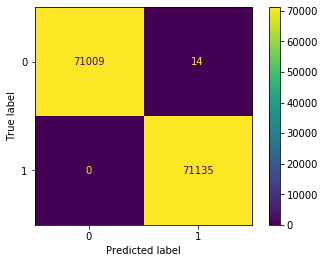

In [43]:
cm_resampled_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_resampled,display_labels=[0,1])
cm_resampled_rf.plot()
plt.show()

In [44]:
print("Evaluation of the random forest model with resampled data: ")
print("Accuracy score: ",accuracy_score(y_re_test,y_re_pred))
print("F1 score: ", f1_score(y_re_test,y_re_pred))
print("Recall score: ", recall_score(y_re_test,y_re_pred))
print("Precision score: ",precision_score(y_re_test,y_re_pred))

Evaluation of the random forest model with resampled data: 
Accuracy score:  0.9999015180292351
F1 score:  0.9999016052402238
Recall score:  1.0
Precision score:  0.9998032298416


In [45]:
import pickle 

In [46]:
pickle.dump(resampled_rf,open('model.pkl','wb'))